Bhavya Parmar
NUID 002249226

- Homework 3

In [1]:
!pip install textblob

In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

%matplotlib inline

In [4]:
import pandas as pd
import io
merge_df = pd.DataFrame()

csv_files = [
    "B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin.csv",
    "B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv",
    "B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv",
    "B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv",
    "B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv",
    "B079TD7HG2_NatrolMelatoninSleepAidGummy.csv",
    "B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv",
]

for file_name in csv_files:
    temp_df = pd.read_csv(file_name)

    merge_df = pd.concat([merge_df, temp_df], ignore_index=True)
merge_df.head()


,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [5]:
merge_df.isna().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    15808
badge                             309
reviewed_product_attribute       2095
reviewed_variant_asin            2095
variant_review_url               2095
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                        28
review_comment_count            15910
review_header                       5
no_of_people_reacted_helpful    13149
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [6]:
merge_df = merge_df.dropna(subset=["review_text"])

In [7]:
merge_df.isna().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    15780
badge                             308
reviewed_product_attribute       2087
reviewed_variant_asin            2087
variant_review_url               2087
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                         0
review_comment_count            15882
review_header                       2
no_of_people_reacted_helpful    13123
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [8]:
merge_df['dose'] = merge_df['product_title'].str.extract(r'(\d+)\s?mg', expand=False)

merge_df = merge_df.dropna(subset=['dose'])
final_df = merge_df[['product_title', 'average_rating', 'review_text', 'review_header', 'review_rating', 'dose', 'reviewed_variant_asin']]
final_df.head()

,product_title,average_rating,review_text,review_header,review_rating,dose,reviewed_variant_asin
3200,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Wish I would have known about the artificial s...,Taste awful! Nasty after taste!,2,12,B07GR9WBFY
3201,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Work well. Usually put me out about an hour af...,Works great,5,12,B07GR9WBFY
3202,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Works fast,Works fast,5,12,B07GR9WBFY
3203,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Excellent for sleeping,Very useful,5,12,B07GR9WBFY
3204,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,I like melatonin because it is a natural way t...,Carlye Melatoin,5,12,B07GR9WBFY


In [9]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

final_df['sentiment'] = final_df['review_text'].apply(calculate_sentiment)


<ipython-input-9-178fde9c641d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['sentiment'] = final_df['review_text'].apply(calculate_sentiment)


In [10]:
final_sentimental = final_df.groupby('dose')['review_rating'].mean()

In [11]:
final_sentimental

dose
1     3.892581
10    4.251670
12    4.236348
20    3.985000
Name: review_rating, dtype: float64

In [12]:
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 'Favorable'
    elif rating == 3:
        return 'Moderate'
    else:
        return 'Unfavourable'

review_rating_sentiments = final_df['review_rating'].apply(map_rating_to_sentiment)

In [13]:
ratings_sentiment = review_rating_sentiments

In [14]:
ratings_sentiment

3200     Unfavourable
3201        Favorable
3202        Favorable
3203        Favorable
3204        Favorable
             ...     
15905        Moderate
15906        Moderate
15907    Unfavourable
15908       Favorable
15909       Favorable
Name: review_rating, Length: 12685, dtype: object

In [15]:
ratings_sentiment = pd.concat([ratings_sentiment, final_df['dose']], axis=1)

In [16]:
ratings_sentiment

,review_rating,dose
3200,Unfavourable,12
3201,Favorable,12
3202,Favorable,12
3203,Favorable,12
3204,Favorable,12
...,...,...
15905,Moderate,12
15906,Moderate,12
15907,Unfavourable,12
15908,Favorable,12


In [17]:
!pip install plotly

In [18]:
import pandas as pd
import plotly.express as px

sample_data = final_df.sample(n=1000)

sample_data['count'] = sample_data.groupby('dose')['dose'].transform('size')

fig = px.scatter(sample_data, x='dose', y='sentiment', size='count',
                 hover_name='dose',
                 color='sentiment',
                 size_max=60,
                 title='Interactive Bubble Plot of Sentiment Polarity Distribution Based on Dose')

fig.update_layout(xaxis_title='Dose',
                  yaxis_title='Sentiment Polarity',
                  legend_title='Sentiment')

fig.show()


<ipython-input-19-0b83093117df>:3: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



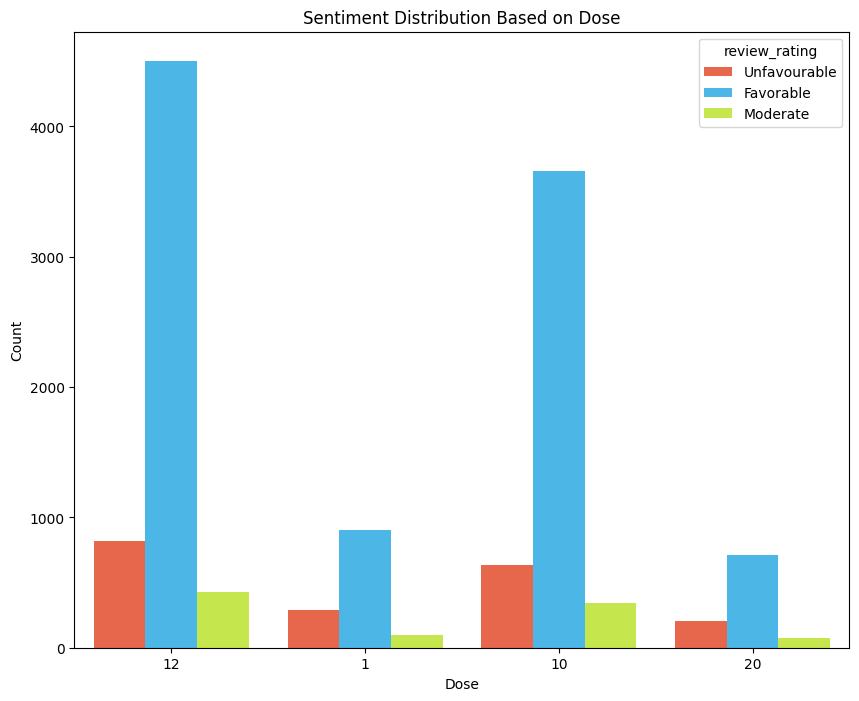

In [19]:
plt.figure(figsize=(10, 8))
custom_palette = ['#FF5733', '#33C1FF', '#D4FF33', '#B533FF', '#FF3358']
sns.countplot(x='dose', hue=review_rating_sentiments, data=final_df, palette=custom_palette)
plt.title('Sentiment Distribution Based on Dose')
plt.xlabel('Dose')
plt.ylabel('Count')
plt.show()



In [20]:
import plotly.express as px

fig = px.scatter_3d(final_df, x='average_rating', y='sentiment', z='dose',
                    color='sentiment',
                    title='3D Scatter Plot of Average Rating vs. Sentiment Polarity vs. Dose',
                    labels={'average_rating': 'Average Rating', 'sentiment': 'Sentiment', 'dose': 'Dose'},
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()


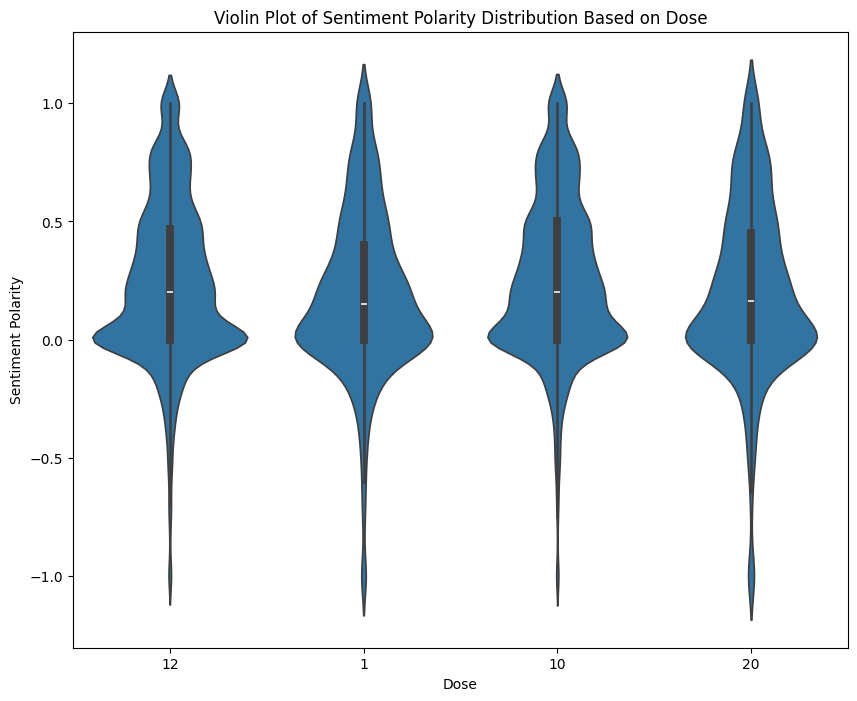

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.violinplot(x='dose', y='sentiment', data=final_df)
plt.title('Violin Plot of Sentiment Polarity Distribution Based on Dose')
plt.xlabel('Dose')
plt.ylabel('Sentiment Polarity')
plt.show()


In [22]:
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')

final_df.head()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

final_df['review_text'].fillna('<blank>', inplace=True)
processed_review = final_df['review_text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=200, max_df=0.8, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(final_df['review_text'])

feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

tfidf_df['dose'] = final_df['dose'].astype(int)

display(tfidf_df.describe())
display(tfidf_df.info())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,10,10mg,12,12mg,15,20,30,5mg,able,actually,...,weird,woke,won,work,worked,working,works,worth,year,years
count,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000
mean,0.009780,0.006949,0.005781,0.005765,0.004902,0.008340,0.012212,0.006985,0.005978,0.007325,...,0.004598,0.005867,0.004059,0.050420,0.011849,0.004765,0.062146,0.004361,0.004778,0.008378
std,0.061218,0.055296,0.047169,0.046573,0.043128,0.056606,0.063303,0.052816,0.048735,0.052671,...,0.043652,0.047255,0.039710,0.132475,0.073864,0.046612,0.177796,0.044346,0.042764,0.052628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.770832,1.000000,0.706312,0.854385,1.000000,1.000000,0.925150,0.854498,...,0.806201,0.732729,0.805542,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.739443


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 200 entries, 10 to years
dtypes: float64(200)
memory usage: 19.4 MB


None

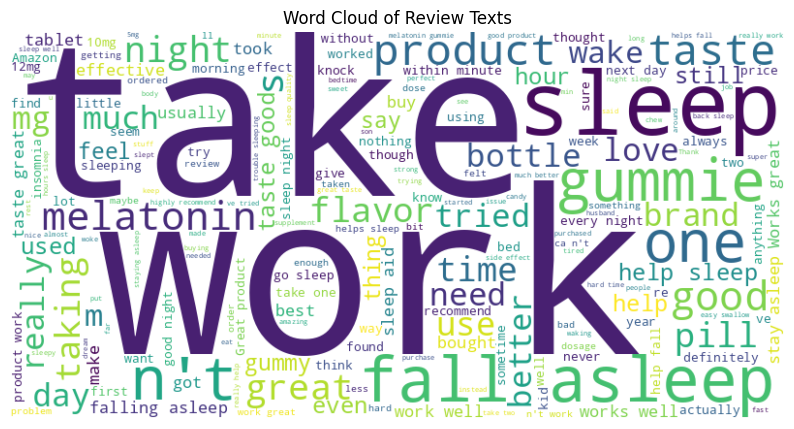

In [23]:
all_text = ' '.join(processed_review)

wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


In [24]:
import plotly.express as px

correlation_matrix = tfidf_df.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="Terms", y="Terms", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                title='Interactive Correlation Matrix of TF-IDF Values',
                color_continuous_scale='RdBu_r')

fig.update_layout(xaxis_tickangle=-45, yaxis_tickangle=0)

fig.show()

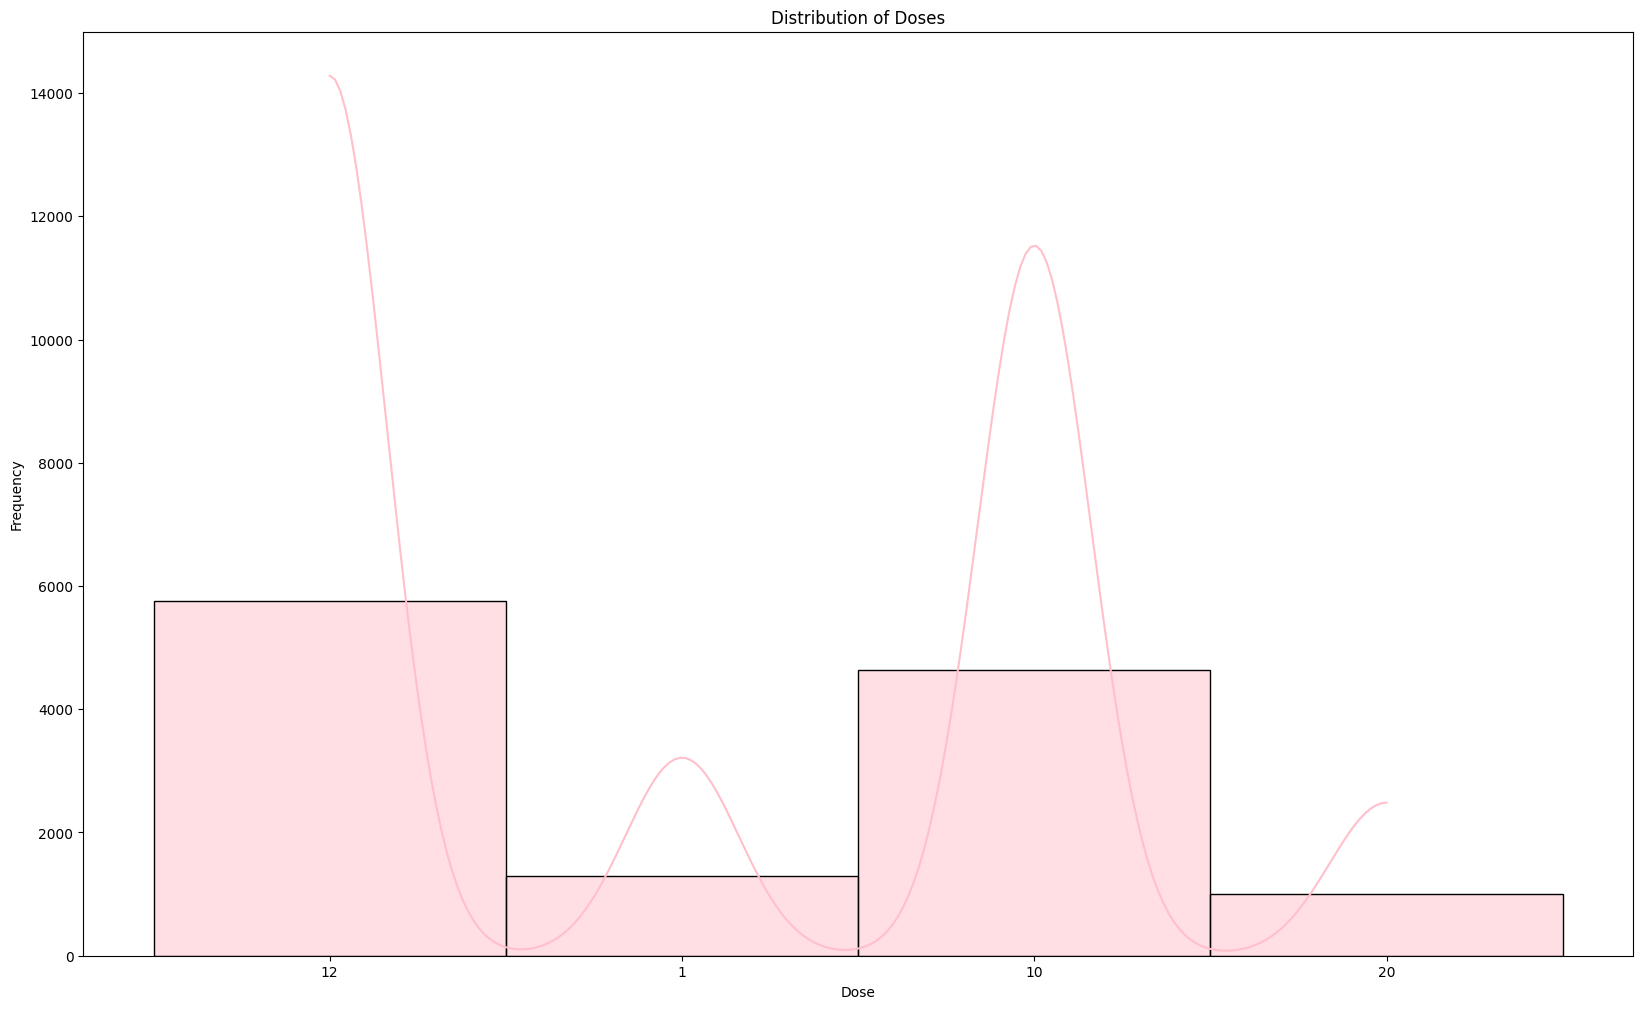

In [25]:
plt.figure(figsize=(20,12))
sns.histplot(final_df['dose'], bins=40, kde=True, color='pink')
plt.title('Distribution of Doses')
plt.xlabel('Dose')
plt.ylabel('Frequency')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

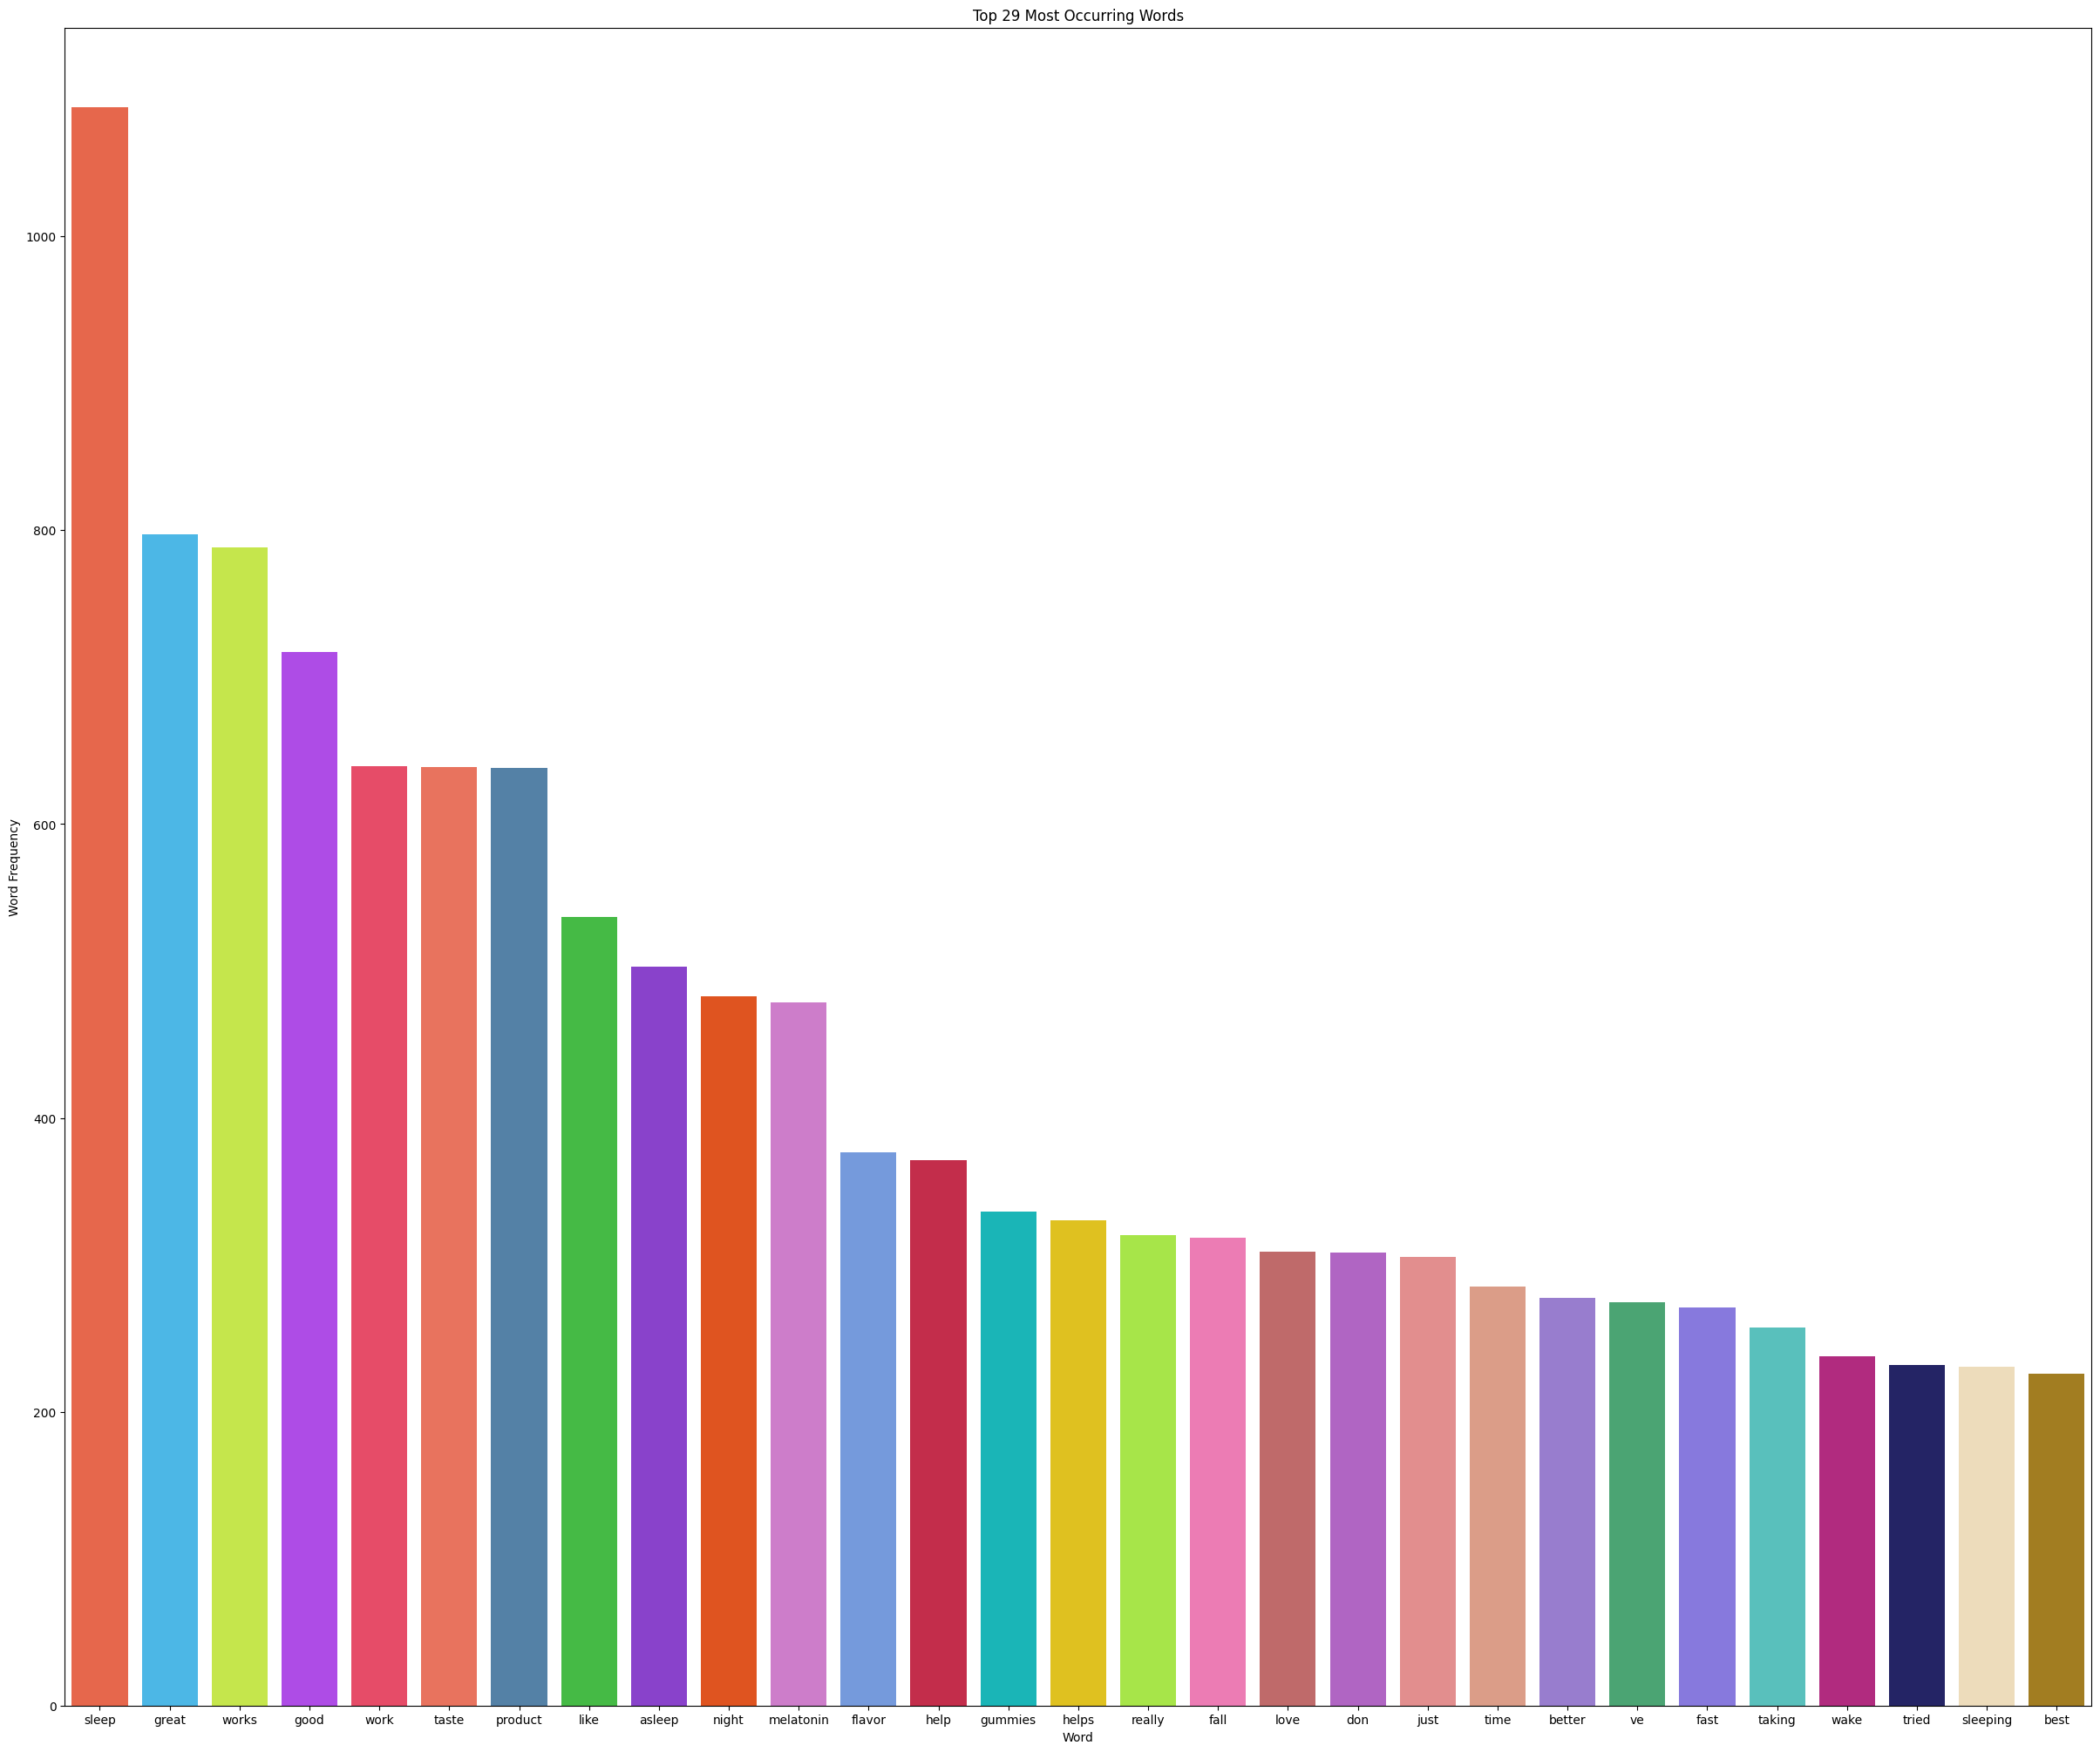

In [27]:
plt.figure(figsize=(30, 25))
word_frequencies = tfidf_df.drop('dose', axis=1).sum(axis=0)
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)
top_words = sorted_word_frequencies.head(29)
custom_palette = ['#FF5733', '#33C1FF', '#D4FF33', '#B533FF', '#FF3358','#FF6347', '#4682B4', '#32CD32', '#8A2BE2', '#FF4500',
    '#DA70D6', '#6495ED', '#DC143C', '#00CED1', '#FFD700',
    '#ADFF2F', '#FF69B4', '#CD5C5C', '#BA55D3', '#F08080',
    '#E9967A', '#9370DB', '#3CB371', '#7B68EE', '#48D1CC',
    '#C71585', '#191970', '#F5DEB3', '#B8860B', '#006400']
sns.barplot(x=top_words.index, y=top_words.values, palette=custom_palette)
plt.title('Top 29 Most Occurring Words')
plt.xlabel('Word')
plt.ylabel('Word Frequency')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

final_df['review_text'].fillna('<blank>', inplace=True)
final_df['processed_review_text'] = final_df['review_text'].apply(preprocess_text)

X = final_df[['processed_review_text', 'average_rating', 'review_rating', 'sentiment']]
y = final_df['dose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

column_transformer = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_features=150, max_df=0.8, stop_words='english'), 'processed_review_text'),
        ('scaler', StandardScaler(), ['average_rating', 'review_rating'])
    ],
    remainder='passthrough'
)

from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ('preprocess', column_transformer),
    ('classifier', LogisticRegression(random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7276166456494325


In [29]:
final_df.head()

,product_title,average_rating,review_text,review_header,review_rating,dose,reviewed_variant_asin,sentiment,processed_review_text
3200,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Wish I would have known about the artificial s...,Taste awful! Nasty after taste!,2,12,B07GR9WBFY,-0.75,Wish would known artificial sweetener taste pr...
3201,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Work well. Usually put me out about an hour af...,Works great,5,12,B07GR9WBFY,-0.25,Work well . Usually put hour taking .
3202,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Works fast,Works fast,5,12,B07GR9WBFY,0.20,Works fast
3203,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,Excellent for sleeping,Very useful,5,12,B07GR9WBFY,1.00,Excellent sleeping
3204,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,I like melatonin because it is a natural way t...,Carlye Melatoin,5,12,B07GR9WBFY,0.10,like melatonin natural way get help going slee...


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), ["reviewed_variant_asin"])
    ],
    remainder='passthrough'
)

final_df["reviewed_variant_asin"].fillna("<blank>", inplace = True)
rvasin = column_transformer.fit_transform(final_df)

In [31]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

final_df['review_text'].fillna('<blank>', inplace=True)
final_df['review_header'].fillna('<blank>', inplace=True)
final_df['processed_review_text'] = final_df['review_text'].apply(preprocess_text)
final_df['processed_review_header'] = final_df['review_header'].apply(preprocess_text)

X = final_df[['processed_review_text', 'processed_review_header', 'average_rating', 'review_rating', 'sentiment']]

X = pd.concat([X.reset_index(drop=True), pd.DataFrame(rvasin)], axis=1)
y = final_df['dose']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


vectorizer = TfidfVectorizer(max_features=150, max_df=0.8, stop_words='english')
X_train_tfidf_matrix_text = vectorizer.fit_transform(X_train['processed_review_text'])
X_train_tfidf_matrix_header = vectorizer.fit_transform(X_train['processed_review_header'])
X_test_tfidf_matrix_text = vectorizer.transform(X_test['processed_review_text'])
X_test_tfidf_matrix_header = vectorizer.transform(X_test['processed_review_header'])



In [32]:
X_train_features = pd.concat([X_train.iloc[:, 2:17].reset_index(drop=True), pd.DataFrame(X_train_tfidf_matrix_text.toarray()), pd.DataFrame(X_train_tfidf_matrix_header.toarray())], axis=1)
X_test_features = pd.concat([X_test.iloc[:, 2:17].reset_index(drop=True), pd.DataFrame(X_test_tfidf_matrix_text.toarray()), pd.DataFrame(X_test_tfidf_matrix_header.toarray())], axis=1)

X_train_features.columns = X_train_features.columns.astype(str)
X_test_features.columns = X_test_features.columns.astype(str)

y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

In [33]:
X_train_features['review_rating'] = X_train_features['review_rating'].apply(lambda x: float(x))

In [34]:
X_train_features

,average_rating,review_rating,sentiment,0,1,2,3,4,5,6,...,140,141,142,143,144,145,146,147,148,149
0,4.5,5.0,0.525000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,4.6,5.0,0.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.486538,0.0,0.0,0.0,0.0,0.0
2,4.5,5.0,0.433333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,4.6,5.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4.5,4.0,0.142045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,4.7,4.0,0.106667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9509,4.5,5.0,0.437500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9510,4.5,4.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9511,4.5,5.0,0.250000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train_features.dtypes

average_rating    float64
review_rating     float64
sentiment         float64
0                  object
1                  object
                   ...   
145               float64
146               float64
147               float64
148               float64
149               float64
Length: 315, dtype: object

In [36]:
X_train_features.isna().sum()

average_rating    0
review_rating     0
sentiment         0
0                 0
1                 0
                 ..
145               0
146               0
147               0
148               0
149               0
Length: 315, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(C=0.01, penalty='l1', solver='saga')
model.fit(X_train_features, y_train)

y_pred_logreg = model.predict(X_test_features)

print("Test Set")

print("Logistic Regression accuracy score:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression classification report:")
print(classification_report(y_test, y_pred_logreg))
print()

Test Set
Logistic Regression accuracy score: 0.9255989911727617
Logistic Regression classification report:
              precision    recall  f1-score   support

           1       0.66      1.00      0.80       330
          10       0.95      1.00      0.97      1135
          12       1.00      0.88      0.94      1440
          20       1.00      0.74      0.85       267

    accuracy                           0.93      3172
   macro avg       0.90      0.91      0.89      3172
weighted avg       0.94      0.93      0.93      3172




In [38]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=30)
model.fit(X_train_features, y_train)

y_pred_logreg = model.predict(X_test_features)

print("Test Set")

print("Random Forest accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Random Forest classification report:")
print(classification_report(y_test, y_pred_logreg))
print()

Test Set
Random Forest accuracy: 0.9987389659520807
Random Forest classification report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       330
          10       1.00      1.00      1.00      1135
          12       1.00      1.00      1.00      1440
          20       1.00      0.99      0.99       267

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172


